#### Clustering and PCA Demonstrated

In [1]:
import pandas as pd
import numpy as np

# This is needed to supress pandas DtypeWarning - js
import warnings
from pandas.errors import DtypeWarning
warnings.filterwarnings("ignore", category=DtypeWarning)

In [2]:
players = pd.read_csv("players_22.csv")

In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
players.shape

(19239, 110)

In [5]:
# Feature  yang akan kita gunakan untuk meng-cluster player
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [6]:
# Hapus semua data "nan" pada feature yang dipilih
players = players.dropna(subset=features)

In [7]:
players.shape

(19165, 110)

In [8]:
# Extract data yang hanya terdapat pada feature dan copy pada variable baru (data)
data = players[features].copy()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


In [9]:
data.shape

(19165, 5)

In [10]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# Pseudocode

## High level

1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [11]:
# Step 1: Scale the data from 0 to 10 - the range is optional.
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [12]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [13]:
data.head()
# Now the data is in range of 1 to 10

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [14]:
# Define random centroids for each feature (column)
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: x.sample().iloc[0])
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [15]:
k = 5
centroids = random_centroids(data, k)

In [16]:
# Feature ada 5 -- sehingga jumlah feature untuk satu titik adalah 5 feature.
# Total kombinasi data feature untuk 5 titik adalah 5 x 5
centroids

,0,1,2,3,4
overall,4.521739,4.130435,4.521739,3.543478,4.326087
potential,3.543478,4.521739,4.130435,5.108696,4.326087
wage_eur,1.038627,1.115880,1.007725,1.000000,1.656652
value_eur,1.042497,1.045976,3.110505,1.041337,1.011181
age,4.666667,6.000000,4.333333,1.666667,1.333333


In [17]:
# Compute distance each data point to centroid and assign label to each data
# based on its closeness to centroids.
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [18]:
# Label each data points
labels = get_labels(data, centroids)
labels[:100]

0     2
1     2
2     1
3     2
4     2
     ..
95    2
96    2
97    1
98    1
99    1
Length: 100, dtype: int64

In [19]:
labels.value_counts()

3    7679
1    5650
0    4993
2     705
4     138
Name: count, dtype: int64

In [20]:
# Step 4. Update new centroids based on labelled data.
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [21]:
# Visualize data - 5D to 2D using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [22]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) 
    data_2d = pca.fit_transform(data) # Implementation of PCA
    centroids_2d = pca.transform(centroids.T) 
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    # Plot centroids
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], marker='o', s=200, c='red', label='Centroids')
    plt.show()

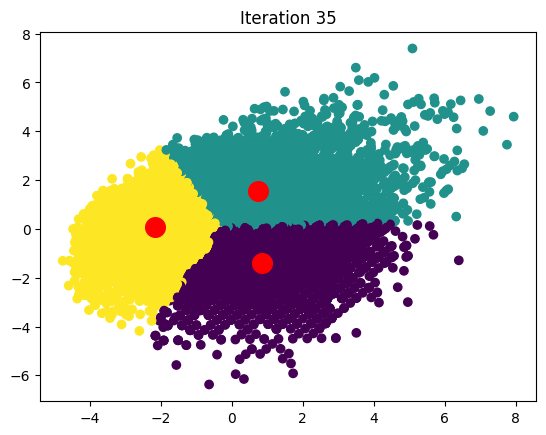

In [23]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [24]:
centroids
# Interpretating the data
# Check the value, wage -- star player highest

,0,1,2
overall,4.784633,5.806043,3.206838
potential,4.506962,6.497993,4.928473
wage_eur,1.118904,1.420001,1.028505
value_eur,1.044980,1.285501,1.026614
age,5.472247,3.596161,2.518708


In [25]:
players[labels==2][['short_name'] + features][:20]

,short_name,overall,potential,wage_eur,value_eur,age
7025,Sandeiro Leal,68,68,7000.0,1400000.0,21
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
8165,Elton Coengo,67,67,6000.0,1200000.0,21
8166,Freddy Cardouso,67,67,4000.0,1200000.0,21
8254,M. Suleymanov,67,71,5000.0,1500000.0,21
8677,J. Calesti,66,66,500.0,1000000.0,21
9183,Breno Laranjeiro,66,66,4000.0,1000000.0,21


In [26]:
labels.value_counts()

0    7173
2    6223
1    5769
Name: count, dtype: int64

In [27]:
## Solving using KMeans from sklearn

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(5)
kmeans.fit(data)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [30]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3,4
overall,7.072421,2.971078,4.927000,5.616039,4.192332
potential,7.253208,4.859783,6.105085,5.254454,4.061635
wage_eur,2.259790,1.021147,1.147518,1.255157,1.050518
value_eur,1.885489,1.019118,1.095555,1.081798,1.027398
age,4.373271,2.423269,3.118261,6.075686,4.924540


Tested for k = 1 ....119977.27702954022
Tested for k = 2 ....76379.31101568972
Tested for k = 3 ....53205.144839848515
Tested for k = 4 ....43245.69298471172
Tested for k = 5 ....36775.58624378035
Tested for k = 6 ....32263.31295472048
Tested for k = 7 ....43192.56858374938


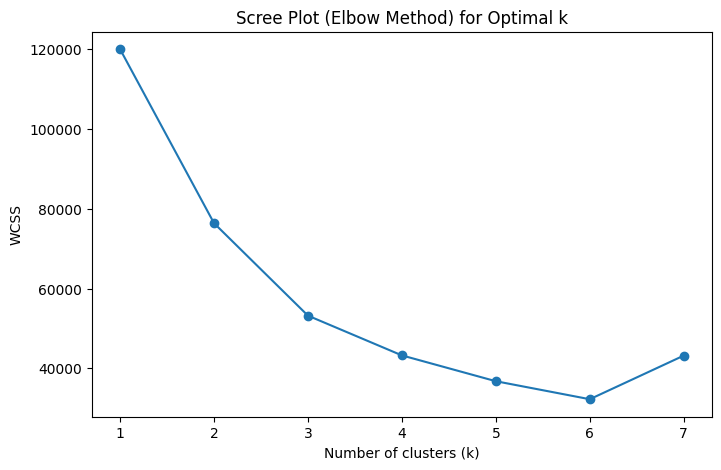

In [31]:
# Fungsi untuk menghitung WCSS
def compute_wcss(data, labels, centroids):
    wcss = 0
    for i in range(centroids.shape[1]):
        cluster_points = data[labels == i]
        centroid = centroids.iloc[:, i]
        wcss += ((cluster_points - centroid) ** 2).sum().sum()
    return wcss

# Simulasi pemilihan k dan scree plot
wcss_values = []
K_range = range(1, 8)

for k in K_range:
    
    centroids = random_centroids(data, k)
    old_centroids = pd.DataFrame()
    iteration = 1
    max_iterations = 100

    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids
        labels = get_labels(data, centroids)
        centroids = new_centroids(data, labels, k)
        iteration += 1

    # Hitung WCSS untuk k ini
    wcss = compute_wcss(data, labels, centroids)
    wcss_values.append(wcss)
    print(f'Tested for k = {k} ....{wcss}')

# Plot scree plot (elbow method)
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Scree Plot (Elbow Method) for Optimal k')
plt.show()
